# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.title()
    # If the city is ucnique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(len(cities))

601


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
#holder variables
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

lat=[]
lon=[]
date=[]
temp=[]
wind=[]
cloud=[]
city_name = []
humidity=[]
country=[]
counter=0
counter1 = 1

#get data

for city in cities:
    try:
        query_url = base_url + "appid=" + api_key + "&q=" + city + "&units=" + units
        #print(query_url)
        response = requests.get(query_url + city).json()
        #print(response)
        print(f"Making request number: {counter} of set {counter1} | {city}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        date.append(response['dt'])
        temp_temp=round((9/5 * (response['main']['temp_max']-273)+32),2)
        temp.append(temp_temp)
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        city_name.append(response['name'])
        counter = counter + 1
        if counter == 51:
            counter1 = counter1 + 1
            counter = 0
            time.sleep(60)
    except KeyError:
        print('Could not find city. Skipping...')
   



Making request number: 0 of set 1 | Hasaki
Making request number: 1 of set 1 | San Andres
Making request number: 2 of set 1 | Popondetta
Making request number: 3 of set 1 | Pisco
Making request number: 4 of set 1 | Ostrovnoy
Making request number: 5 of set 1 | Illoqqortoormiut
Could not find city. Skipping...
Making request number: 5 of set 1 | Fairbanks
Making request number: 6 of set 1 | Atuona
Making request number: 7 of set 1 | Norman Wells
Making request number: 8 of set 1 | Grindavik
Making request number: 9 of set 1 | Klaksvik
Making request number: 10 of set 1 | Yellowknife
Making request number: 11 of set 1 | Busselton
Making request number: 12 of set 1 | Berlevag
Making request number: 13 of set 1 | Puerto Ayora
Making request number: 14 of set 1 | Lebu
Making request number: 15 of set 1 | Hermanus
Making request number: 16 of set 1 | Saskylakh
Making request number: 17 of set 1 | Clonakilty
Making request number: 18 of set 1 | Cabo San Lucas
Making request number: 19 of set 

Making request number: 7 of set 4 | Shugurovo
Making request number: 8 of set 4 | College
Making request number: 9 of set 4 | Dong Xoai
Making request number: 10 of set 4 | Harper
Making request number: 11 of set 4 | Batemans Bay
Making request number: 12 of set 4 | Lishu
Making request number: 13 of set 4 | Road Town
Making request number: 14 of set 4 | Bolungarvik
Could not find city. Skipping...
Making request number: 14 of set 4 | Port Macquarie
Making request number: 15 of set 4 | Port Hedland
Making request number: 16 of set 4 | Sao Joao Da Barra
Making request number: 17 of set 4 | Port Blair
Making request number: 18 of set 4 | Payakumbuh
Making request number: 19 of set 4 | Tura
Making request number: 20 of set 4 | Chokurdakh
Making request number: 21 of set 4 | Dyakonovo
Could not find city. Skipping...
Making request number: 21 of set 4 | Mys Shmidta
Could not find city. Skipping...
Making request number: 21 of set 4 | Redmond
Making request number: 22 of set 4 | Hobyo
Makin

Making request number: 8 of set 7 | Huarmey
Making request number: 9 of set 7 | Galle
Making request number: 10 of set 7 | Port Lincoln
Making request number: 11 of set 7 | Kristianstad
Making request number: 12 of set 7 | Beringovskiy
Making request number: 13 of set 7 | Taketa
Making request number: 14 of set 7 | Nuuk
Making request number: 15 of set 7 | Sampit
Making request number: 16 of set 7 | Tarko-Sale
Making request number: 17 of set 7 | Livny
Making request number: 18 of set 7 | Shingu
Making request number: 19 of set 7 | Katsuura
Making request number: 20 of set 7 | Marinette
Making request number: 21 of set 7 | Richards Bay
Making request number: 22 of set 7 | Pitimbu
Making request number: 23 of set 7 | Pemangkat
Could not find city. Skipping...
Making request number: 23 of set 7 | Nguiu
Could not find city. Skipping...
Making request number: 23 of set 7 | Shenjiamen
Making request number: 24 of set 7 | Angoram
Making request number: 25 of set 7 | Aswan
Making request numb

Making request number: 4 of set 10 | Simpang
Making request number: 5 of set 10 | Ambon
Making request number: 6 of set 10 | Oistins
Making request number: 7 of set 10 | Antofagasta
Making request number: 8 of set 10 | Baykit
Making request number: 9 of set 10 | Amapa
Making request number: 10 of set 10 | Miri
Making request number: 11 of set 10 | Salta
Making request number: 12 of set 10 | Teofilo Otoni
Making request number: 13 of set 10 | Muscat
Making request number: 14 of set 10 | Kalevala
Making request number: 15 of set 10 | Mapastepec
Making request number: 16 of set 10 | Orbetello
Making request number: 17 of set 10 | Dongsheng
Making request number: 18 of set 10 | Andenes
Could not find city. Skipping...
Making request number: 18 of set 10 | Saint-Pierre
Making request number: 19 of set 10 | Pushkinskiye Gory
Making request number: 20 of set 10 | Cameron Park
Making request number: 21 of set 10 | Hambantota
Making request number: 22 of set 10 | Huangzhai
Making request number

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:

#create dictionary
weather_dict = {
    "City": city_name,
    "Cloudines": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    'Max Temp': temp,
    'Wind Speed': wind
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Cloudines,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hasaki,75,JP,1553181035,88,35.73,140.83,65.26,4.60
1,San Andres,48,PH,1553181230,98,13.32,122.68,81.92,1.76
2,Popondetta,80,PG,1553181230,93,-8.77,148.24,69.23,0.86
3,Pisco,0,PE,1553176800,30,-13.71,-76.20,71.87,1.50
4,Ostrovnoy,64,RU,1553181230,90,68.05,39.51,25.76,4.31


In [36]:
#convert date
temp_date = datetime.datetime.fromtimestamp(date[0])
#print(temp_date)
#timestamp = datetime.datetime.fromtimestamp(1500000000)
print(temp_date.strftime('%m/%d/%Y %H:%M:%S'))
print('Date:', temp_date.date())  
convert_date = temp_date.date()
print (convert_date)

03/21/2019 11:10:35
Date: 2019-03-21
2019-03-21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

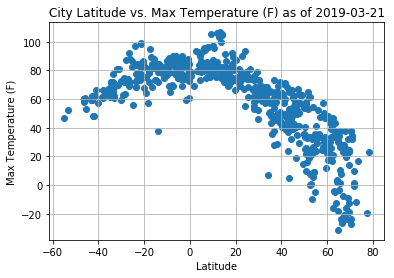

<Figure size 432x288 with 0 Axes>

In [37]:
#plot city lat vs. max temp

plt.scatter(lat,temp)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F) as of ' + str(convert_date))
plt.show()
plt.savefig("output_data/temp.png")

#### Latitude vs. Humidity Plot

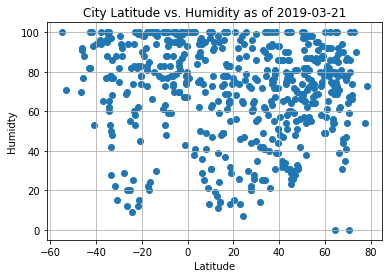

<Figure size 432x288 with 0 Axes>

In [38]:
#plot city lat vs. Humidity
plt.scatter(lat,humidity)
plt.grid()
plt.xlabel('Latitude')
plt.ylim(-5,105)
plt.ylabel('Humidty')
plt.title('City Latitude vs. Humidity as of ' + str(convert_date))
plt.show()
plt.savefig("output_data/humidty.png")

#### Latitude vs. Cloudiness Plot

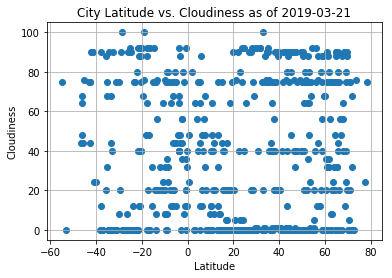

<Figure size 432x288 with 0 Axes>

In [39]:
#plot city lat vs. cloudiness
plt.scatter(lat,cloud)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness as of ' + str(convert_date))
plt.show()
plt.savefig("output_data/cloudiness.png")

#### Latitude vs. Wind Speed Plot

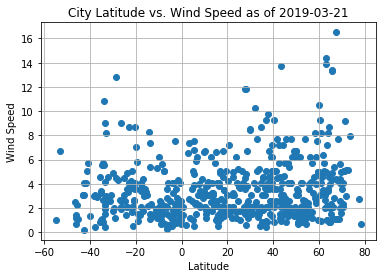

<Figure size 432x288 with 0 Axes>

In [40]:
#plot city lat vs. wind speed
plt.scatter(lat,wind)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed as of ' + str(convert_date))
plt.show()
plt.savefig("output_data/wind speed.png")